In [1]:
# Import necessary modules
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path
dataset_path = '/content/drive/MyDrive/Dataset'

Mounted at /content/drive


In [3]:
# Load the dataset
def load_dataset(path):
    data = []
    labels = []

    label_encoder = LabelEncoder()

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            label = folder
            for filename in os.listdir(folder_path):
                if filename.endswith(".jpg"):
                    img_path = os.path.join(folder_path, filename)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (64, 64))
                    data.append(img.flatten())
                    labels.append(label)

    labels_encoded = label_encoder.fit_transform(labels)

    return np.array(data), np.array(labels_encoded)


In [5]:
# Load the dataset
data, labels = load_dataset(dataset_path)

# Flatten and normalize pixel values
data = data.reshape((data.shape[0], -1)) / 255.0

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)


In [7]:
# Train the model
svm_classifier.fit(train_data, train_labels)


SVC(kernel='linear')

In [8]:
# Make predictions on the test set
predictions = svm_classifier.predict(test_data)


In [9]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.29


In [10]:
# Display classification report
print("Classification Report:\n", classification_report(test_labels, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.48      0.36       608
           1       0.49      0.81      0.61       577
           2       0.16      0.22      0.19       606
           3       0.20      0.17      0.18       505
           4       0.49      0.34      0.40       493
           5       0.19      0.20      0.20       388
           6       0.23      0.18      0.20       507
           7       0.30      0.14      0.19       612
           8       0.28      0.20      0.24       509
           9       0.17      0.12      0.14       595

    accuracy                           0.29      5400
   macro avg       0.28      0.29      0.27      5400
weighted avg       0.28      0.29      0.27      5400



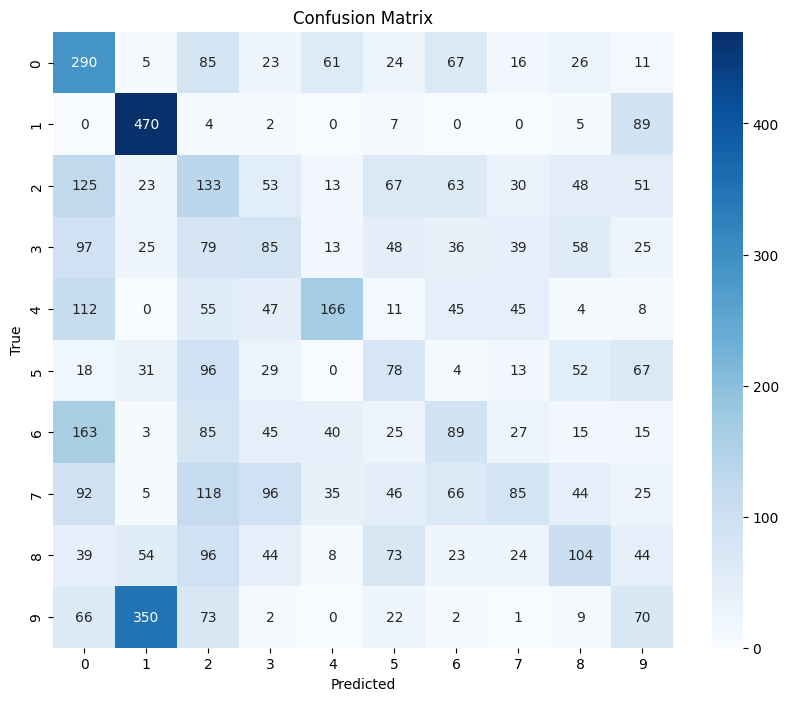

In [11]:
# Assume label_encoder is the same one used before
label_encoder = LabelEncoder()

# Fit and transform the labels to get the original class names
label_encoder.fit(np.concatenate([train_labels, test_labels]))
label_names = label_encoder.inverse_transform(np.unique(np.concatenate([train_labels, test_labels])))

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [14]:
# Assume conf_matrix is the multiclass confusion matrix
# Calculate Precision, Recall, F1 Score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(test_labels, predictions, pos_label=1)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, predictions, pos_label=1)

# Display metrics
print(f"Precision: {np.mean(precision):.4f}")
print(f"Recall: {np.mean(recall):.4f}")
print(f"F1 Score: {np.mean(f1):.4f}")
print(f"Area Under ROC Curve (AUC): {roc_auc:.4f}")


Precision: 0.1733
Recall: 0.3052
F1 Score: 0.2702
Area Under ROC Curve (AUC): 0.3809


In [ ]:
# Save the trained model using joblib
joblib.dump(svm_classifier, 'svm_model.joblib')

# Load the saved model
loaded_svm_model = joblib.load('svm_model.joblib')